In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes


In [ ]:
# age,sex,body mass index, average blood pressure, total serum cholesterol, low-density lipoproteins, 
# high-density lipoproteins, total cholesterol / HDL, possibly log of serum triglycerides level, blood sugar level

In [2]:
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
df.shape


(442, 11)

In [7]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [9]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [13]:
no_of_outliers = {}

for col in df.columns[:-1]: # not used target
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    no_of_outliers[col] = outliers.shape[0]

print("No Of Outliers:")
print(pd.Series(no_of_outliers))


No Of Outliers:
age    0
sex    0
bmi    3
bp     0
s1     8
s2     7
s3     7
s4     2
s5     4
s6     9
dtype: int64


In [15]:
df_capped = df.copy()

for col in df.columns[:-1]:  
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capped[col] = df[col].clip(lower_bound, upper_bound)

In [29]:
no_of_outliers = {}
# Checking whether all outliers are gone or not

# M-1


for col in df_capped.columns[:-1]: # not used target
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_capped[(df_capped[col] < lower_bound) | (df_capped[col] > upper_bound)]
    no_of_outliers[col] = outliers.shape[0]

print("No Of Outliers:")
print(pd.Series(no_of_outliers))


No Of Outliers:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


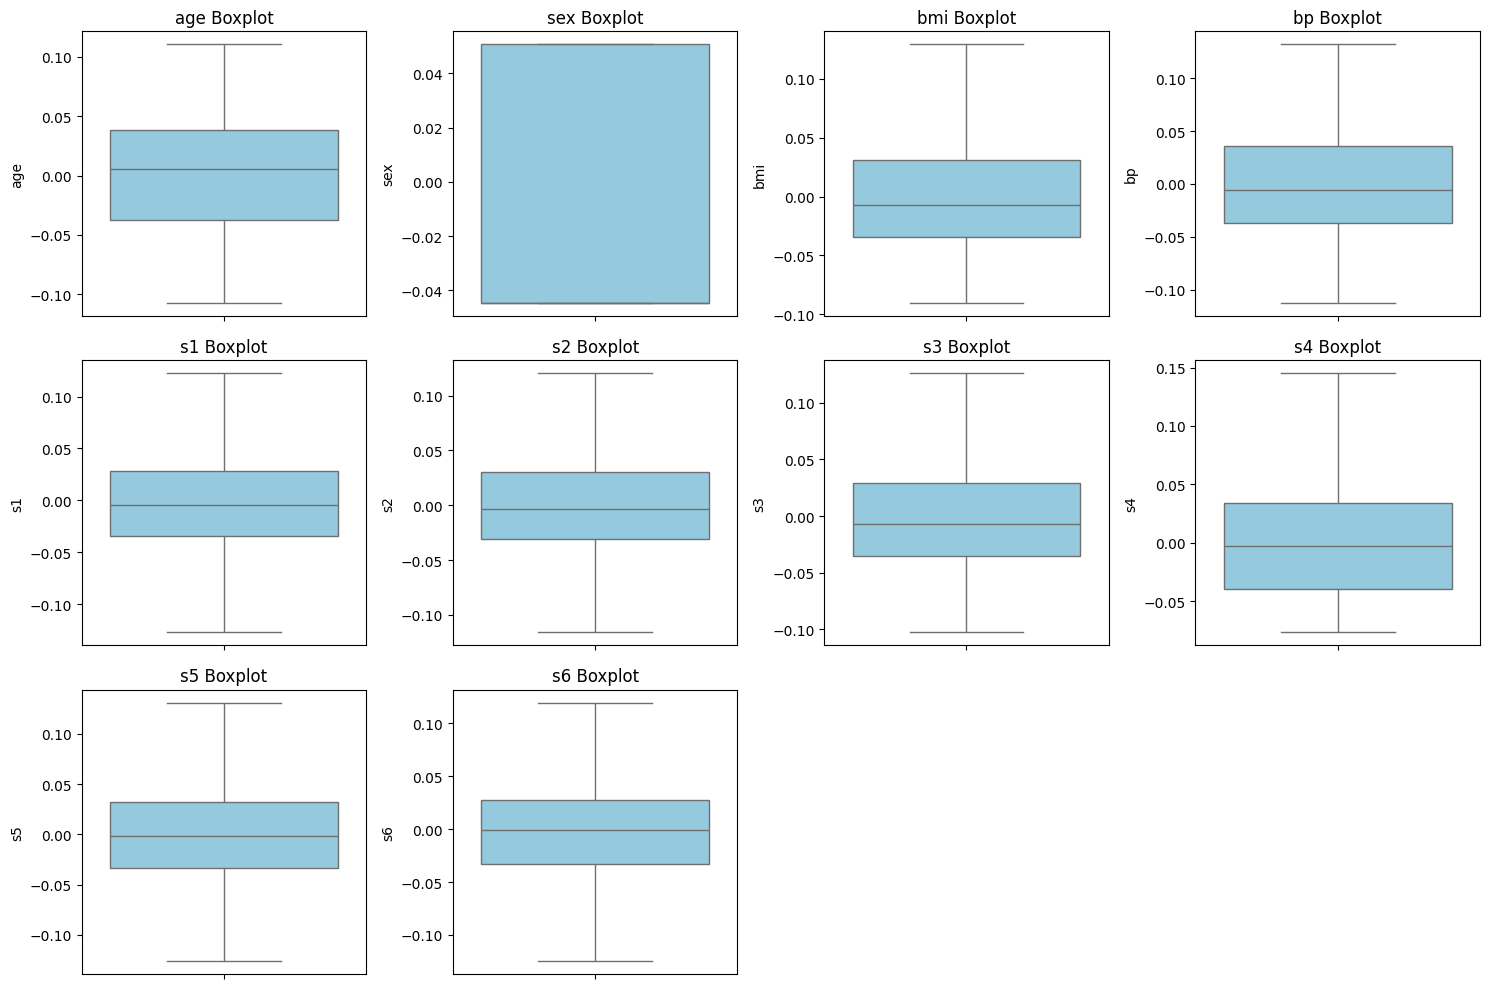

In [30]:
#M-2

plt.figure(figsize=(15, 10))
for i, col in enumerate(df_capped.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df_capped[col], color='skyblue')
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()


In [19]:
#duplicate row checking
print("Duplicate rows:", df_capped.duplicated().sum())

Duplicate rows: 0


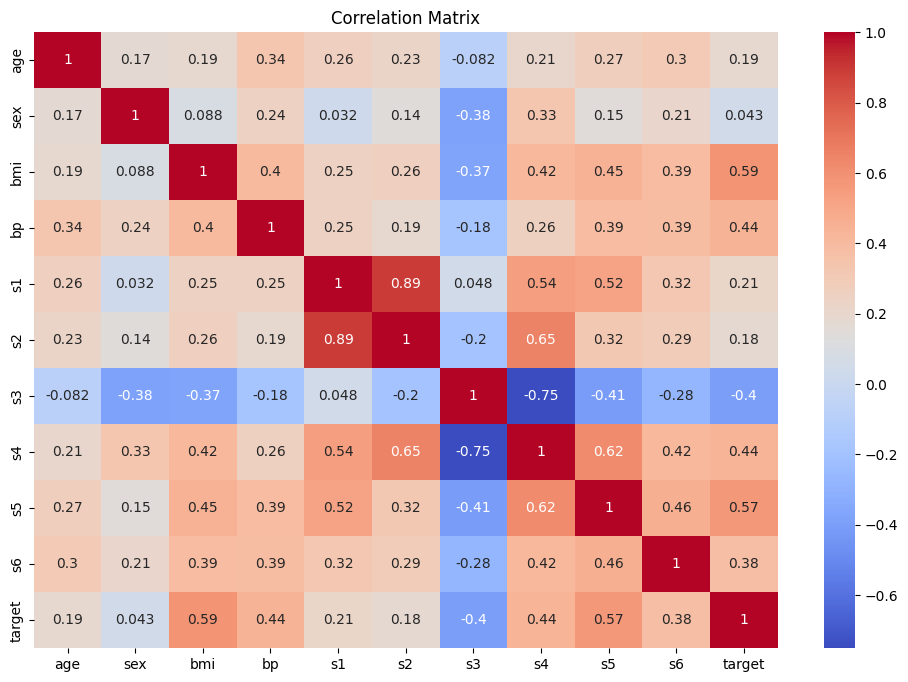

In [23]:
#correlatio
plt.figure(figsize=(12, 8))
sns.heatmap(df_capped.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [34]:
correlations = df_capped.corr()
print(correlations['target'].sort_values(ascending=False))


target    1.000000
bmi       0.586965
s5        0.566320
bp        0.441482
s4        0.435153
s6        0.380456
s1        0.213454
age       0.187889
s2        0.179048
sex       0.043062
s3       -0.401010
Name: target, dtype: float64


In [38]:
# By this we can keep the values s5, bmi, bp, s4, s3 (All betwwen -1 to -.4 and .4 to 1)
#we should drop sex as it has weak corr

In [56]:
top_features = ['bmi', 's5', 'bp', 's4', 's3']
optional_features = ['age', 's1', 's2', ]
# df = df.drop(columns=['sex'])  ## i have already deleted it so i have commented it

In [24]:
#visualiztion

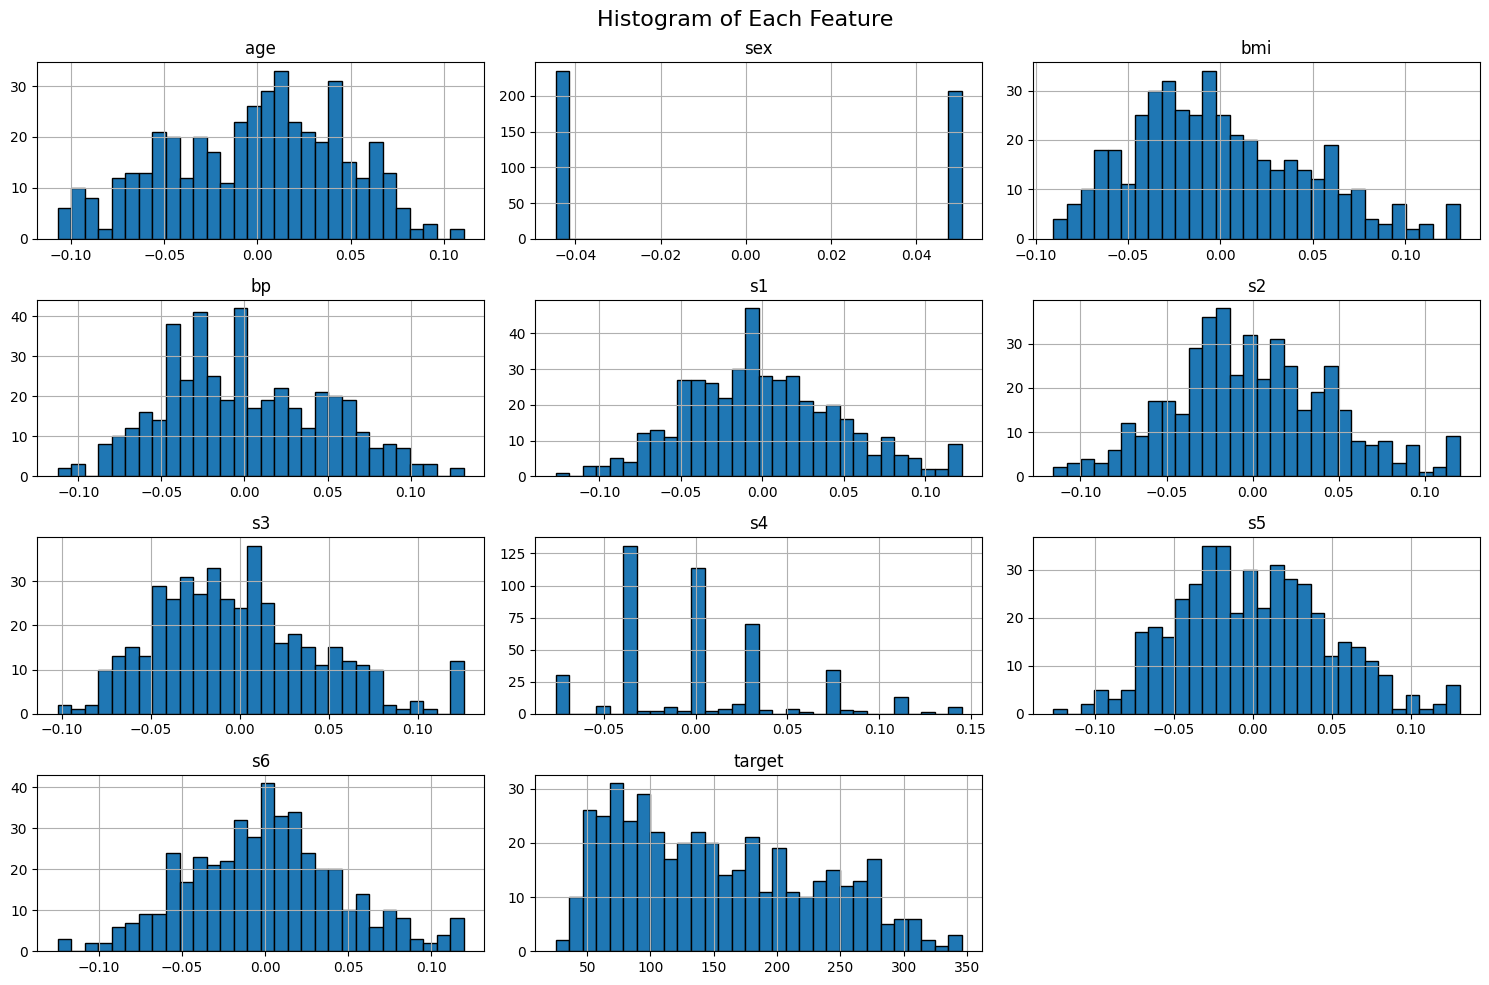

In [31]:
df_capped.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histogram of Each Feature", fontsize=16)
plt.tight_layout()
plt.show()

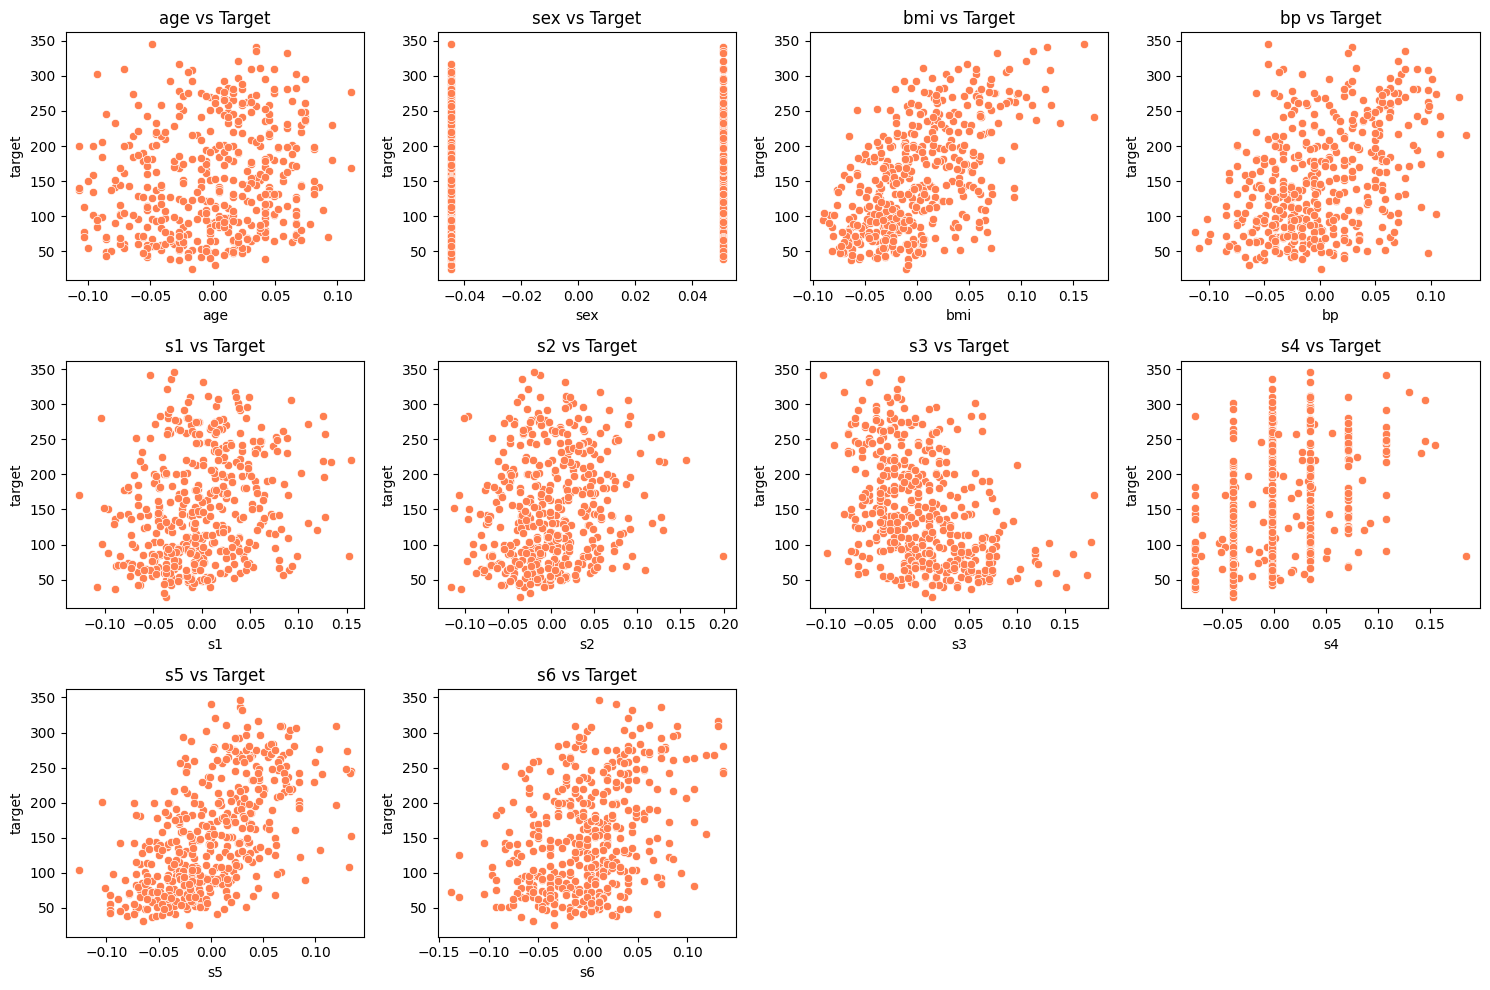

In [33]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_capped.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=df[col], y=df_capped['target'], color='coral')
    plt.title(f"{col} vs Target")
    plt.tight_layout()
plt.show()

In [40]:
# selecting best features

In [41]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df.drop(columns=['target'])
y = df['target'] 


In [70]:
#statistically checking whether our ideology of correlation manualyy was correct or not
for k in [5, 6, 7, 8]:
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    print(f"k={k}: {list(selected_features)}")


k=5: ['bmi', 'bp', 's3', 's4', 's5']
k=6: ['bmi', 'bp', 's3', 's4', 's5', 's6']
k=7: ['bmi', 'bp', 's1', 's3', 's4', 's5', 's6']
k=8: ['age', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6']


In [57]:
top_features

['bmi', 's5', 'bp', 's4', 's3']

In [58]:
optional_features

['age', 's1', 's2']

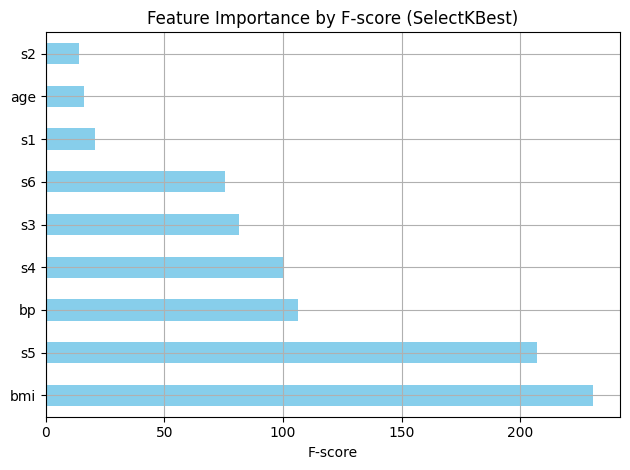

In [72]:
#another way also 
scores = selector.scores_
feature_scores = pd.Series(scores, index=X.columns)

# Sort and plot
feature_scores.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Feature Importance by F-score (SelectKBest)")
plt.xlabel("F-score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
#so we will be using k =5 as it is correct wrt our prediction

In [66]:
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Top Features:", list(selected_features))

Top Features: ['bmi', 'bp', 's3', 's4', 's5']


In [60]:
#so now lets cleam our datset

In [68]:
df_clean = df_capped[selected_features.tolist() + ['target']]


In [ ]:
#now we should traintest teh data as preprocessing is part is moreover done

In [75]:
from sklearn.model_selection import train_test_split

X = df_clean.drop('target', axis=1)
y = df_clean['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
